**<h1 style="text-align: center;">Social Media vs Mental Health</h1>**
*<p  style="text-align: center;"> by: <u>Alejandro Villarreal Rodríguez</u></p>*
<img src="./img/rrss_photo.png" border="5px solid red"/>

**<h2 style="text-align: center;">📌 TEMA</h2>**
<p style="text-align: center;"> Este EDA analiza cómo el uso de diversas plataformas de redes sociales, como Instagram, Facebook y TikTok, etc. afecta al comportamiento, bienestar y salud mental de los usuarios. Más adelante , desarrollaremos el tema en diferentes hipótesis.</p>

_______________________________________________________________________________________________________________________________________________________

**<h2 style="text-align: center;">✏️ FUENTES DE DATOS</h2>**

**📚 Importamos librerias**:

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**💻 Datasets:**

In [178]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df_2 = pd.read_csv('./data/smmh.csv')
fuente_df2 = 'https://www.kaggle.com/datasets/shabdamocharla/social-media-mental-health'

df_3 = pd.read_csv('./data/Time-Wasters on Social Media.csv')
fuente_df3 = 'https://www.kaggle.com/datasets/muhammadroshaanriaz/time-wasters-on-social-media'

In [179]:
print('fuente:',fuente_df2)
df_2.head()

fuente: https://www.kaggle.com/datasets/shabdamocharla/social-media-mental-health


,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [180]:
print('fuente:',fuente_df3)
df_3.head()

fuente: https://www.kaggle.com/datasets/muhammadroshaanriaz/time-wasters-on-social-media


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,Number of Sessions,Video ID,Video Category,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,Frequency,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,80,17,4229,Pranks,24,7867,5,26,22,87,Night,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,228,14,2131,Pranks,19,5944,6,25,31,46,Afternoon,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,30,6,4367,Vlogs,19,8674,3,9,7,88,Evening,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,101,19,1507,Vlogs,4,2477,2,6,41,93,Night,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,136,6,2159,Gaming,19,3093,7,13,21,4,Morning,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


**📋 Limpiar DF_2:**

- **Nombres de columnas:**

In [181]:
df_2.rename(columns= {'1. What is your age?' : 'Age',
                '2. Gender' : 'Gender',
                '3. Relationship Status' : 'Relationship',
                '4. Occupation Status' : 'Profession',
                '6. Do you use social media?' : 'Social_Media_User',
                '7. What social media platforms do you commonly use?' : 'Platform',
                '8. What is the average time you spend on social media every day?' : 'Time_Spent',
                "11. Do you feel restless if you haven't used Social media in a while?" : 'Addiction_Level',
                '18. How often do you feel depressed or down?' : 'Sad_Frecuency'}, inplace= True)

- **Eliminar columnas que no vayamos a utilizar:**

In [182]:
df_2 = df_2.drop(['Timestamp', 
                '5. What type of organizations are you affiliated with?',
                '9. How often do you find yourself using Social media without a specific purpose?',
                '10. How often do you get distracted by Social media when you are busy doing something?',
                '12. On a scale of 1 to 5, how easily distracted are you?',
                '13. On a scale of 1 to 5, how much are you bothered by worries?',
                '14. Do you find it difficult to concentrate on things?',
                '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
                '16. Following the previous question, how do you feel about these comparisons, generally speaking?',
                '17. How often do you look to seek validation from features of social media?',
                '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?',
                '20. On a scale of 1 to 5, how often do you face issues regarding sleep?'], axis=1)

**📋 Limpiar DF_3:**

- **Nombres de columnas:**

In [183]:
df_3.rename(columns= {'Total Time Spent' : 'Time_Spent',
                    'Addiction Level' : 'Addiction_Level',
                    'Satisfaction' : 'Satisfaction_Level'}, inplace= True)

In [184]:
df_3 = df_3.drop(['UserID',
                'Location',
                'Income',
                'Debt',
                'Owns Property',
                'Demographics',
                'Number of Sessions',
                'Video ID',
                'Video Category',
                'Video Length',
                'Engagement',
                'Importance Score',
                'Time Spent On Video',
                'Number of Videos Watched',
                'Scroll Rate',
                'Frequency',
                'ProductivityLoss',
                'Watch Reason',
                'Watch Time',
                'Self Control',
                'CurrentActivity',
                'ConnectionType'
                ], axis= 1)

- **Arreglo: Edad To int:**

In [185]:
df_2['Age'] = df_2['Age'].astype('int64')

- **Arreglo: Profession:**

In [186]:
df_2.loc[(df_2['Profession']  == 'University Student') | (df_2['Profession']  == 'School Student'), 'Profession'] = 'Student'

In [187]:
df_3.loc[df_3['Profession'] == 'Students', 'Profession'] = 'Student'
df_3.loc[df_3['Profession'] != 'Student', 'Profession'] = 'Salaried Worker'

- **Ajustar Addiction_Level evaluado de 0-10 en vez de 0-5:**

In [188]:
df_2['Addiction_Level'] = df_2['Addiction_Level'] * 2

- **Sacar Satisfaction_Level en base al Sad_Frecuency (y evaluarlo de 0-10):**

In [189]:
df_2['Satisfaction_Level'] = 10 - (df_2['Sad_Frecuency']*2)
df_2 = df_2.drop(['Sad_Frecuency'], axis = 1)

- **Crear columna donde todos los usuarios usan Social_Media (Ningún valor nulo en plataforma):**

In [190]:
df_3['Social_Media_User'] = 'Yes'

- **Arreglar Time Spent para poder juntar en una columna:**

In [191]:
df_3['Time_Spent'] = df_3['Time_Spent']/60

In [192]:
df_def_1_limpio = df_3
df_def_2_limpio = df_2

In [193]:
df_3['Time_Spent'] = df_3['Time_Spent'].apply(
    lambda x: 'Less than an Hour' if x < 1 else
            'Between 1 and 2 hours' if 1 <= x < 2 else
            'Between 2 and 3 hours' if 2 <= x < 3 else
            'Between 3 and 4 hours' if 3 <= x < 4 else
            'Between 4 and 5 hours' if 4 <= x <= 5 else
            'More than 5 hours'
)

- **Importamos Nuestra Tabla (Limpia):**

In [194]:
df = pd.read_csv('EDA_csv_limpio.csv')
df.drop('Unnamed: 0', axis=1, inplace= True)

_______________________________________________________________________________________________________________

**<h3 style="text-align: center;"> HIPÓTESIS + CÓDIGO + GRÁFICA</h3>**
_______________________________________________________________________________________________________________

**<h3 style="text-align: center;">📴 <u>1. Relacion: Dispositivo ↔ Uso del Móvil</u></h3>**
*<p style="text-align: center;"> Esta hipótesis plantea que los usuarios acceden comunmente desde el móvil ya que es más accesible. Además se verificará si la gran mayoría de personas usan redes sociales en sus dispositivos. </p>*

📁 ***Variables:***

In [195]:
device_counts = df['DeviceType'].value_counts()
social_media_users_counts = df['Social_Media_User'].value_counts()

color_MTO = ['#b600ff', '#7800ff', '#00b2ff']

📊 ***Gráficas:***

- **Dispositivo más usado**:

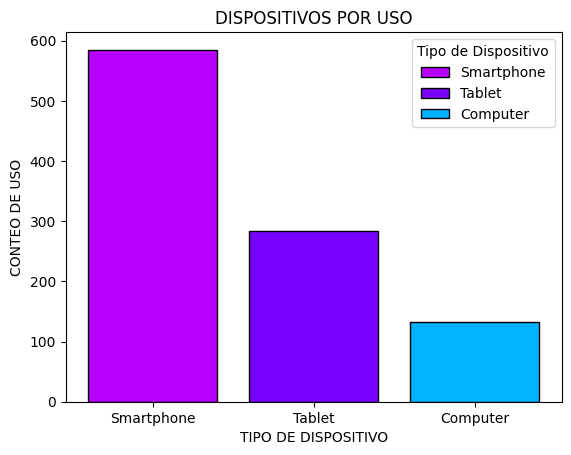

In [196]:
bars_device = plt.bar(device_counts.index, device_counts.values, edgecolor = 'black', color = color_MTO)
plt.xlabel('TIPO DE DISPOSITIVO');
plt.ylabel('CONTEO DE USO');
plt.title('DISPOSITIVOS POR USO')
plt.legend(bars_device, device_counts.index, title='Tipo de Dispositivo');

- **Gente que usa Redes Sociales vs Gente que no usa Redes Sociales**:

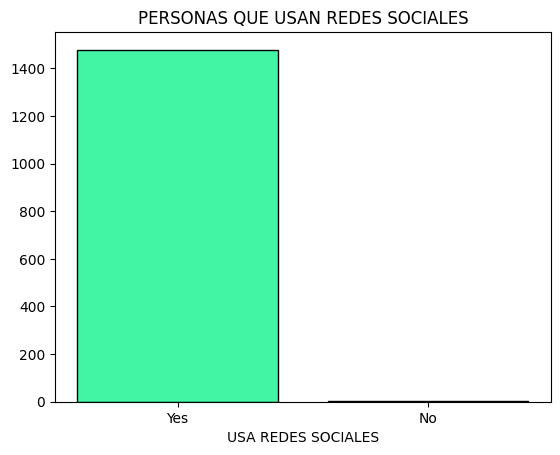

In [197]:
plt.bar(x= social_media_users_counts.index, height= social_media_users_counts.values, color = ['#42f5a4', '#f74557'], edgecolor = 'black');
plt.xlabel('USA REDES SOCIALES');
plt.title('PERSONAS QUE USAN REDES SOCIALES');

- **Gente que usa Redes Sociales vs Gente que no usa Redes Sociales (ZOOM)**:

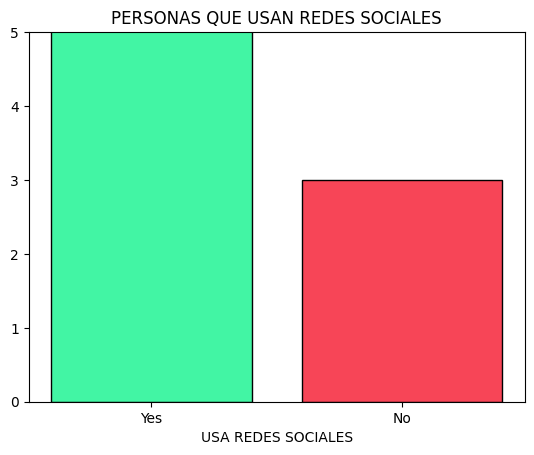

In [198]:
plt.bar(x= social_media_users_counts.index, height= social_media_users_counts.values, color = ['#42f5a4', '#f74557'], edgecolor = 'black');
plt.xlabel('USA REDES SOCIALES');
plt.title('PERSONAS QUE USAN REDES SOCIALES');
plt.ylim(0,5);

_______________________________________________________________________________________________________________

**<h3 style="text-align: center;">😵 <u>2. Relación: Plataforma ↔ Adicción</u></h3>**
*<p style="text-align: center;"> Esta hipótesis verificará si hay algunas plataformas más adictivas que otras. ¿Habrá más adicción cuanto más tóxica sea la plataforma? o por el contrario.. ¿Habrá más adicción en plataformas más visuales? </p>*

📁 ***Variables:***

In [199]:
df_platform_add = df[['Platform', 'Addiction_Level']]

df_tiktok = df_platform_add[df_platform_add['Platform'].str.contains('TikTok')]
adiccion_counts_tiktok = df_tiktok['Addiction_Level'].value_counts().sort_index()

df_twitter = df_platform_add[df_platform_add['Platform'].str.contains('Twitter')]
adiccion_counts_twitter = df_twitter['Addiction_Level'].value_counts().sort_index()

df_instagram = df_platform_add[df_platform_add['Platform'].str.contains('Instagram')]
adiccion_counts_instagram = df_instagram['Addiction_Level'].value_counts().sort_index()

df_youtube = df_platform_add[df_platform_add['Platform'].str.contains('YouTube')]
adiccion_counts_youtube = df_youtube['Addiction_Level'].value_counts().sort_index()

df_facebook = df_platform_add[df_platform_add['Platform'].str.contains('Facebook')]
adiccion_counts_facebook = df_facebook['Addiction_Level'].value_counts().sort_index()

In [200]:
set_colores_onetoten = ['#f94144', '#f3722c', '#f8961e', '#f9c74f' ,'#90be6d', '#43aa8b' , '#4d908e' ,'#577590' ,'#277da1' ,'#1d3557', '#7b2cbf']

📊 ***Gráficas:***

-  **Adicción de TikTok:**

C:\Users\Administrador\AppData\Local\Temp\ipykernel_2500\3390012272.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


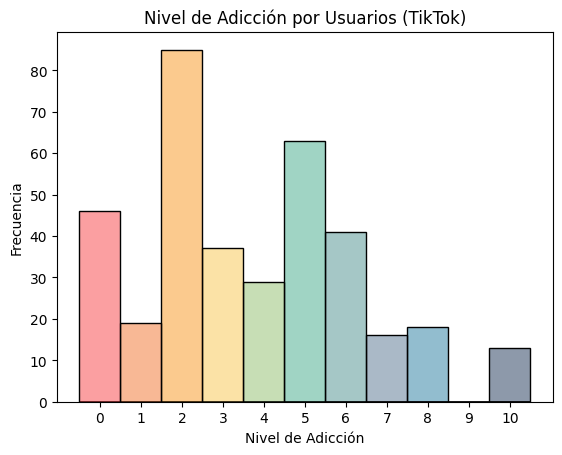

In [201]:
sns.histplot(df_tiktok,x= 'Addiction_Level', hue='Addiction_Level' , discrete= True, palette = set_colores_onetoten[0:10])
plt.title('Nivel de Adicción por Usuarios (TikTok)')
plt.xlabel('Nivel de Adicción')
plt.ylabel('Frecuencia');
plt.xticks([0,1,2,3,4,5,6,7,8,9,10]);
plt.legend().remove()

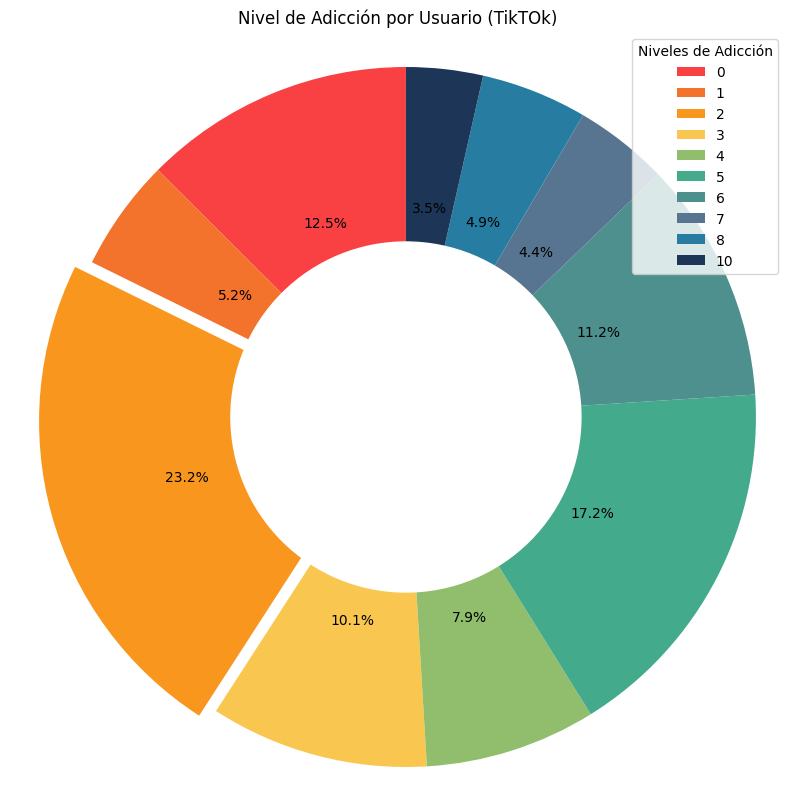

In [202]:
plt.figure(figsize=(10,10))
plt.pie(adiccion_counts_tiktok, colors = set_colores_onetoten[0:10], autopct= '%1.1f%%', startangle = 90, explode=(0,0,0.05,0,0,0,0,0,0,0))
plt.axis('equal')
plt.legend(adiccion_counts_tiktok.index, title="Niveles de Adicción", loc="upper right")
plt.title('Nivel de Adicción por Usuario (TikTOk)');

circle = plt.Circle( (0,0),
                0.5,
                color='white')

p=plt.gcf()
p.gca().add_artist(circle);

- **Adicción de Twitter:**

C:\Users\Administrador\AppData\Local\Temp\ipykernel_2500\1589814831.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove();


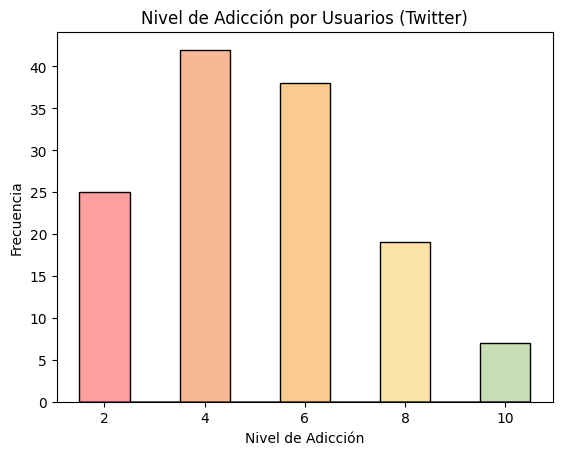

In [203]:
sns.histplot(df_twitter,x= 'Addiction_Level', hue='Addiction_Level' , discrete= True, palette = set_colores_onetoten[0:5])
plt.title('Nivel de Adicción por Usuarios (Twitter)')
plt.xlabel('Nivel de Adicción')
plt.ylabel('Frecuencia');
plt.legend().remove();

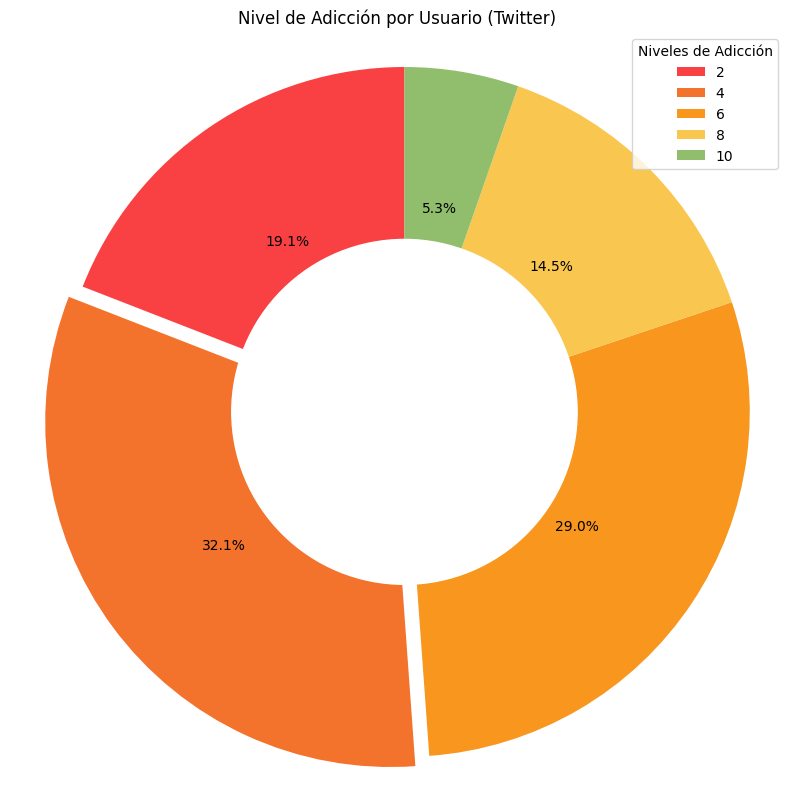

In [204]:
plt.figure(figsize=(10,10))
plt.pie(adiccion_counts_twitter, colors = set_colores_onetoten[0:10], autopct= '%1.1f%%', startangle = 90, explode=(0,0.05,0,0,0))
plt.axis('equal')
plt.legend(adiccion_counts_twitter.index, title="Niveles de Adicción", loc="upper right")
plt.title('Nivel de Adicción por Usuario (Twitter)');

circle = plt.Circle( (0,0),
                0.5,
                color='white')

p=plt.gcf()
p.gca().add_artist(circle);

- **Adicción Instagram:**

C:\Users\Administrador\AppData\Local\Temp\ipykernel_2500\3366186348.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove();


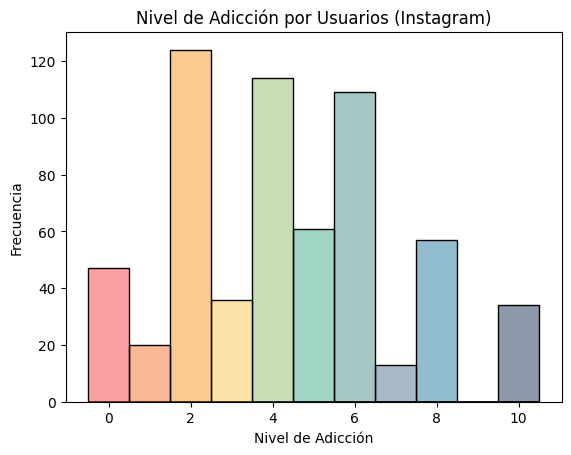

In [205]:
sns.histplot(df_instagram,x= 'Addiction_Level', hue='Addiction_Level' , discrete= True, palette = set_colores_onetoten[0:10])
plt.title('Nivel de Adicción por Usuarios (Instagram)')
plt.xlabel('Nivel de Adicción')
plt.ylabel('Frecuencia');
plt.legend().remove();

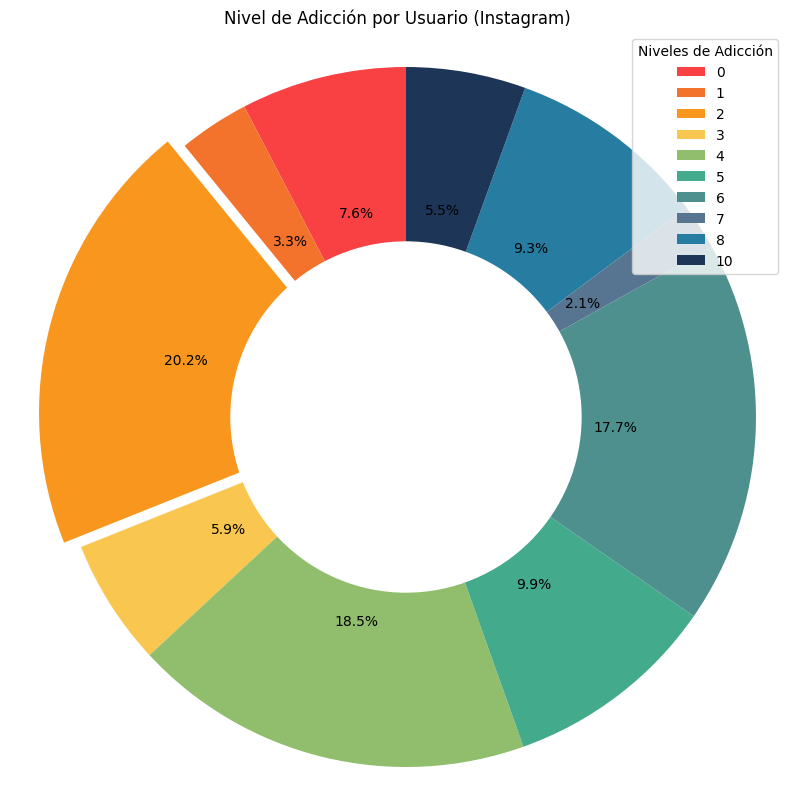

In [206]:
plt.figure(figsize=(10,10))
plt.pie(adiccion_counts_instagram, colors = set_colores_onetoten[0:10], autopct= '%1.1f%%', startangle = 90, explode=(0,0,0.05,0,0,0,0,0,0,0))
plt.axis('equal')
plt.legend(adiccion_counts_instagram.index, title="Niveles de Adicción", loc="upper right")
plt.title('Nivel de Adicción por Usuario (Instagram)');

circle = plt.Circle( (0,0),
                0.5,
                color='white')

p=plt.gcf()
p.gca().add_artist(circle);

- **Adicción YouTube:**

C:\Users\Administrador\AppData\Local\Temp\ipykernel_2500\3498556920.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


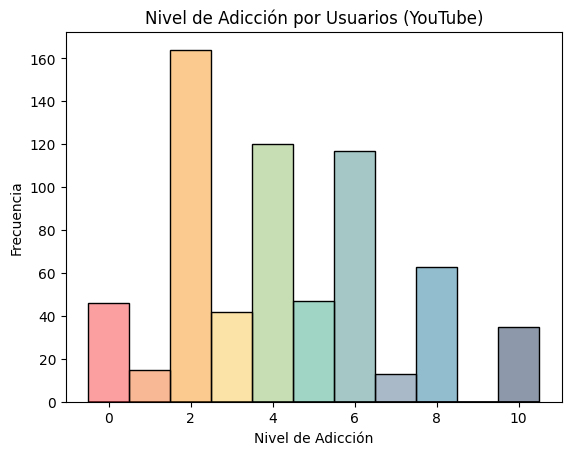

In [207]:
sns.histplot(df_youtube,x= 'Addiction_Level', hue='Addiction_Level' , discrete= True, palette = set_colores_onetoten[0:10])
plt.title('Nivel de Adicción por Usuarios (YouTube)')
plt.xlabel('Nivel de Adicción')
plt.ylabel('Frecuencia');
plt.legend().remove()

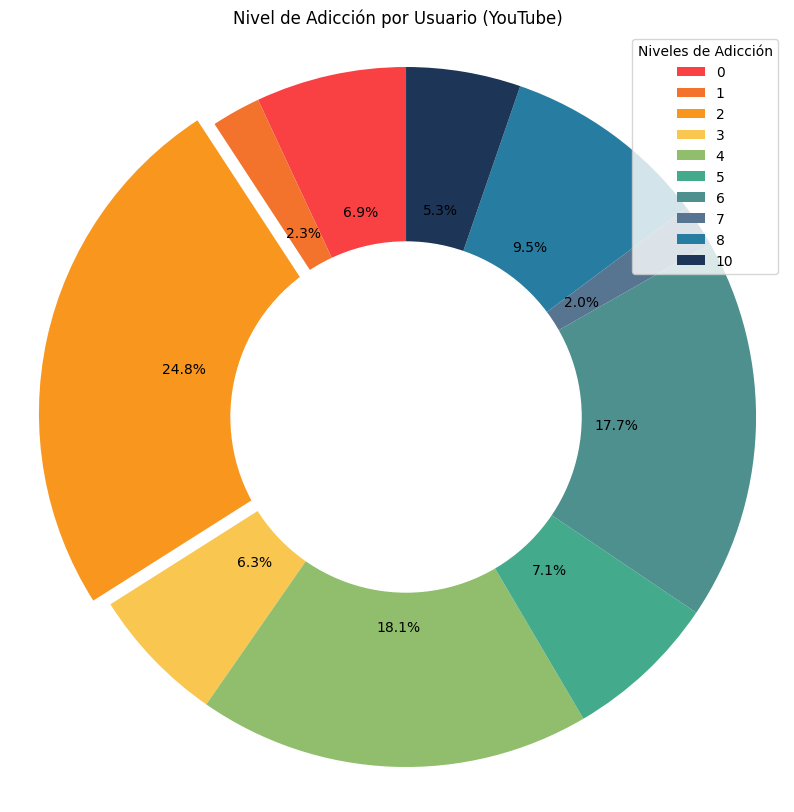

In [208]:
plt.figure(figsize=(10,10))
plt.pie(adiccion_counts_youtube, colors = set_colores_onetoten[0:10], autopct= '%1.1f%%', startangle = 90, explode=(0,0,0.05,0,0,0,0,0,0,0))
circle = plt.Circle( (0,0),
                0.5,
                color='white')
plt.axis('equal')
plt.legend(adiccion_counts_youtube.index, title="Niveles de Adicción", loc="upper right")
plt.title('Nivel de Adicción por Usuario (YouTube)');

circle = plt.Circle( (0,0),
                0.5,
                color='white')

p=plt.gcf()
p.gca().add_artist(circle);

- **Adicción Facebook:**

C:\Users\Administrador\AppData\Local\Temp\ipykernel_2500\74322994.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


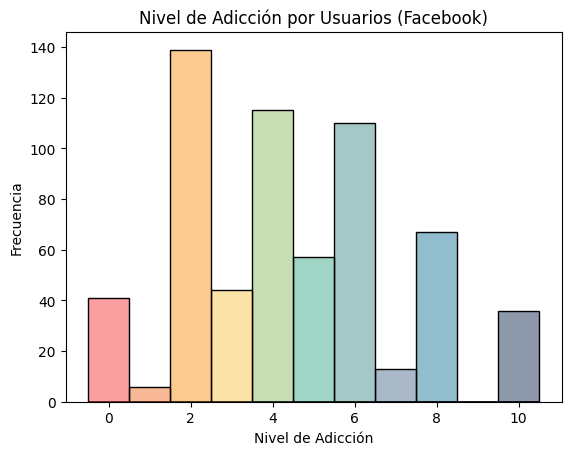

In [209]:
sns.histplot(df_facebook,x= 'Addiction_Level', hue='Addiction_Level' , discrete= True, palette = set_colores_onetoten[0:10])
plt.title('Nivel de Adicción por Usuarios (Facebook)')
plt.xlabel('Nivel de Adicción')
plt.ylabel('Frecuencia');
plt.legend().remove()

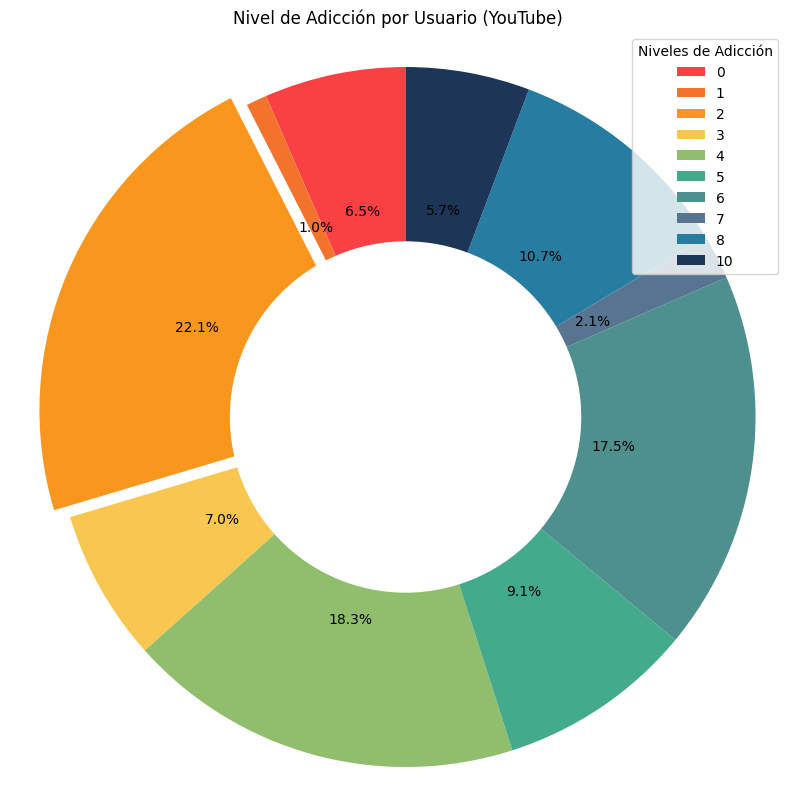

In [210]:
plt.figure(figsize=(10,10))
plt.pie(adiccion_counts_facebook, colors = set_colores_onetoten[0:10], autopct= '%1.1f%%', startangle = 90, explode=(0,0,0.05,0,0,0,0,0,0,0))
circle = plt.Circle( (0,0),
                0.5,
                color='white')
plt.axis('equal')
plt.legend(adiccion_counts_facebook.index, title="Niveles de Adicción", loc="upper right")
plt.title('Nivel de Adicción por Usuario (YouTube)');

circle = plt.Circle( (0,0),
                0.5,
                color='white')

p=plt.gcf()
p.gca().add_artist(circle);

- **Media Adicción por plataforma:**

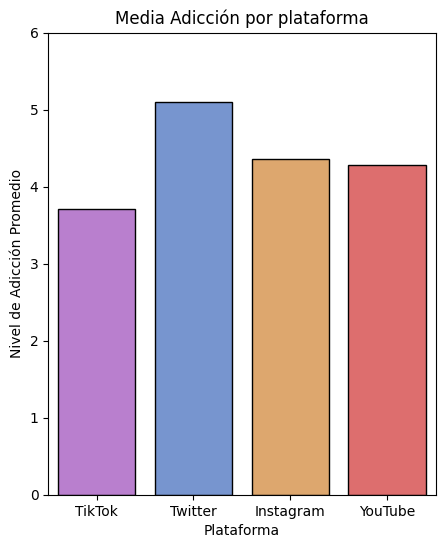

In [211]:
plt.figure(figsize=(5, 6))
sns.barplot(x=['TikTok', 'Twitter', 'Instagram', 'YouTube'], 
            y=[df_tiktok['Addiction_Level'].mean(), df_twitter['Addiction_Level'].mean(), df_instagram['Addiction_Level'].mean(), df_youtube['Addiction_Level'].mean()],
            hue= ['TikTok', 'Twitter', 'Instagram', 'YouTube'],
            palette=['#bf72db', '#6891de', '#f0a85b', '#f05b5b'],
            edgecolor = 'black')
plt.title('Media Adicción por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Nivel de Adicción Promedio')
plt.ylim(0,6);

________________________________________________________________________________________________________________________________________________________

**<h3 style="text-align: center;">👶👴 <u>3. Relación: Edad ↔ Adicción</u></h3>**
*<p style="text-align: center;"> Varios estudios realizados sobre la edad y la vulnerabilidad a las cosas adictivas indican que las personas de entre 13 y 25 años (aprox.) son más vulnerables a la aducción. ¿Se correspondrá este estudio con el nivel de adicción en las redes sociales? </p>*

📁 ***Variables:***

In [212]:
df['Age_Group'] = df['Age'].apply(lambda x: 'Edad Vulnerable (13-25)' if 13 <= x <= 25 else 'Mayor de 25')

📊 ***Gráficas:***

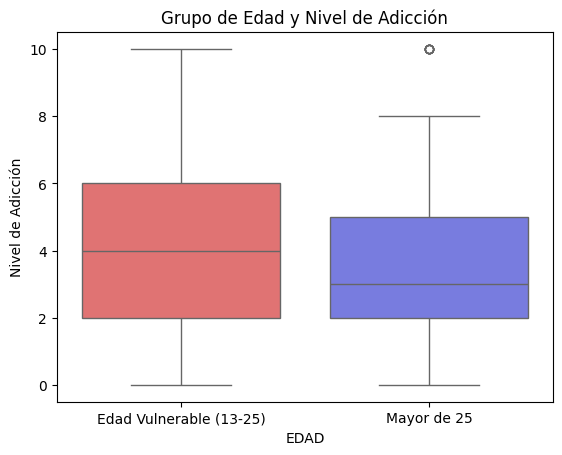

In [213]:
sns.boxplot(df, x='Age_Group', y='Addiction_Level', hue = 'Age_Group', palette= ['#f26161', '#676cf0'])
plt.title('Grupo de Edad y Nivel de Adicción');
plt.xlabel('EDAD');
plt.ylabel('Nivel de Adicción');

_______________________________________________________________________________________________________________

**<h3 style="text-align: center;">👨👩 <u>4. Efecto: Género ↔ Adicción</u></h3>**
*<p style="text-align: center;"> Esta hipótesis representa si hay alguna diferencia entre el nivel de adicción que generan las redes sociales en hombres y mujeres. ¿Afectan de la msima forma?</p>*

📁 ***Variables:***

In [214]:
df_smartphone = df[df['DeviceType'] == 'Smartphone']

avg_add_gen = df.groupby('Gender')['Addiction_Level'].mean().reset_index()[0:2]
avg_sat_gen = df.groupby('Gender')['Satisfaction_Level'].mean().reset_index()[0:2]
color_FMO = ['#f553c2', '#3da6e3']

📊 ***Gráficas:***

- **Adicción por Sexo:**

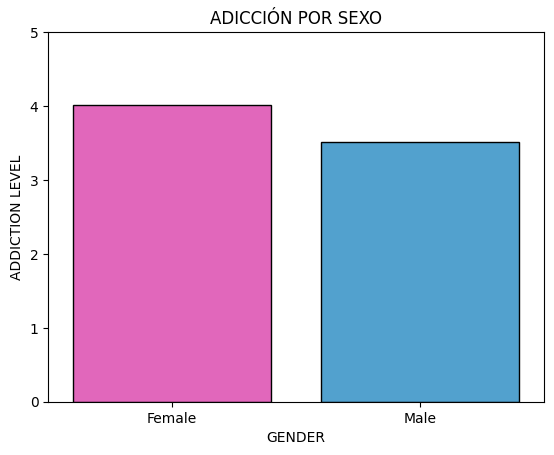

In [215]:
sns.barplot(avg_add_gen, x = 'Gender', y = 'Addiction_Level', hue = ['Female', 'Male'], palette= color_FMO, edgecolor = 'black');
plt.yticks([0,1,2,3,4,5])
plt.xlabel('GENDER');
plt.ylabel('ADDICTION LEVEL');
plt.title('ADICCIÓN POR SEXO');

- **Satisfacción por Sexo:**

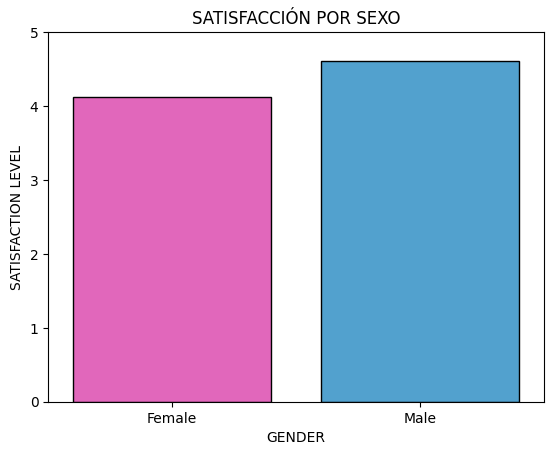

In [216]:
sns.barplot(avg_sat_gen, x = 'Gender', y = 'Satisfaction_Level', hue = 'Gender', palette= color_FMO, edgecolor = 'black');
plt.yticks([0,1,2,3,4,5])
plt.xlabel('GENDER');
plt.ylabel('SATISFACTION LEVEL');
plt.title('SATISFACCIÓN POR SEXO');

_______________________________________________________________________________________________________________

**<h3 style="text-align: center;">👫 <u>5. Relación: Estado civil ↔ Tiempo</u></h3>**
*<p style="text-align: center;"> En esta hipótesis se evaluará la diferencia del uso de las redes sociales según el estado civil de cada usuario. Se predice que alguien que está en una relación cubre su conexión social fuera del ámbito digital en mayor medida.</p>*

📁 ***Variables:***

In [217]:
df_single_married = df[['Relationship', 'Time_Spent']]
df_ts_rship = df_single_married.groupby('Relationship')['Time_Spent'].value_counts().reset_index()

In [218]:
df_ts_rship_divorced = df_ts_rship[df_ts_rship['Relationship'] == 'Divorced']
df_ts_rship_married = df_ts_rship[df_ts_rship['Relationship'] == 'Married']
df_ts_rship_relationship = df_ts_rship[df_ts_rship['Relationship'] == 'In a relationship']
df_ts_rship_single = df_ts_rship[df_ts_rship['Relationship'] == 'Single']

📊 ***Gráficas:***

- **Tiempo en Redes Sociales según Estado Civil:**

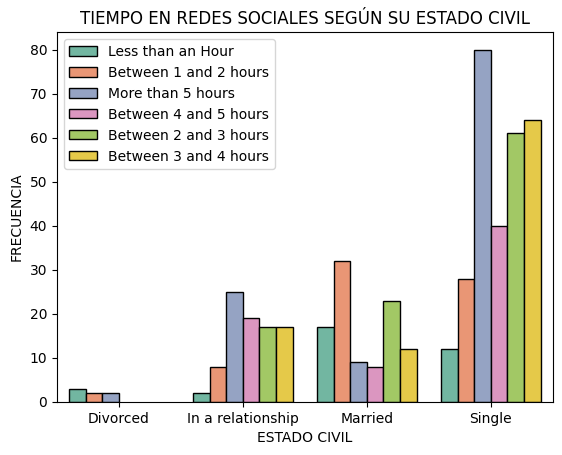

In [219]:
sns.barplot(df_ts_rship, x = 'Relationship', y = 'count', hue = 'Time_Spent', palette = 'Set2', edgecolor = 'black');
plt.xlabel('ESTADO CIVIL')
plt.ylabel('FRECUENCIA')
plt.legend(title = '')
plt.title('TIEMPO EN REDES SOCIALES SEGÚN SU ESTADO CIVIL');

- **Tiempo en Redes Sociales (Con Novio/a):**

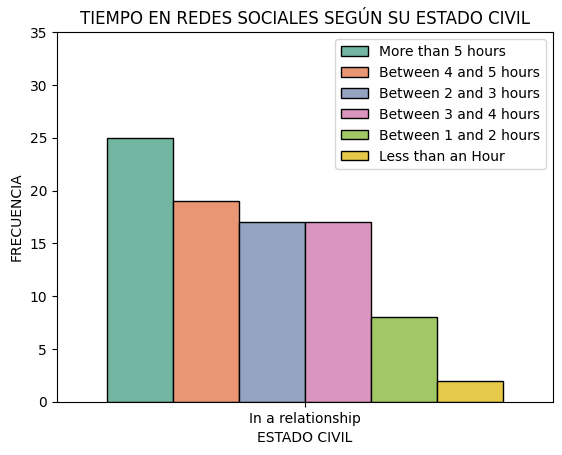

In [220]:
sns.barplot(df_ts_rship_relationship, x = 'Relationship', y = 'count', hue = 'Time_Spent', palette = 'Set2', edgecolor = 'black');
plt.xlabel('ESTADO CIVIL')
plt.ylabel('FRECUENCIA')
plt.ylim(0,35)
plt.legend(title = '')
plt.title('TIEMPO EN REDES SOCIALES SEGÚN SU ESTADO CIVIL');

- **Tiempo en Redes Sociales (Casado):**

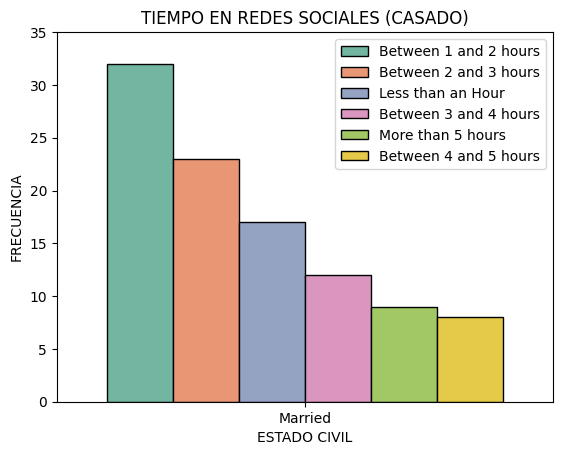

In [221]:
sns.barplot(df_ts_rship_married, x = 'Relationship', y = 'count', hue = 'Time_Spent', palette = 'Set2', edgecolor = 'black');
plt.xlabel('ESTADO CIVIL')
plt.ylabel('FRECUENCIA')
plt.legend(title = '')
plt.ylim(0,35)
plt.title('TIEMPO EN REDES SOCIALES (CASADO)');

- **Tiempo en Redes Sociales (Soltero):**

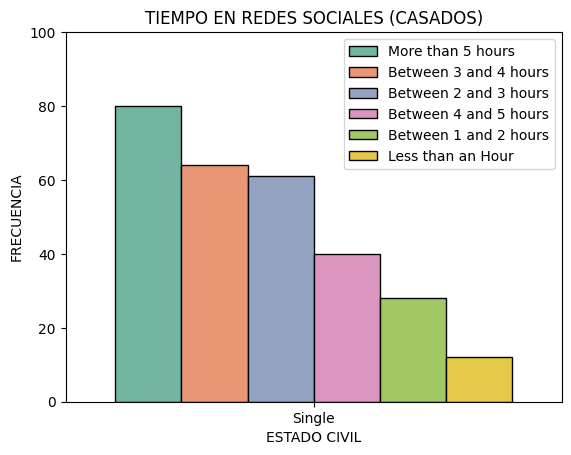

In [222]:
sns.barplot(df_ts_rship_single, x = 'Relationship', y = 'count', hue = 'Time_Spent', palette = 'Set2', edgecolor = 'black');
plt.xlabel('ESTADO CIVIL')
plt.ylabel('FRECUENCIA')
plt.ylim(0,100)
plt.legend(title = '')
plt.title('TIEMPO EN REDES SOCIALES (CASADOS)');

_______________________________________________________________________________________________________________

**<h3 style="text-align: center;">😖🕑 <u>6. Relación: Tiempo de Uso ↔ Satisfacción y Adicción</u></h3>**
*<p style="text-align: center;"> ¿Se encuentra algún tipo de relación entre las horas empleadas en consumir redes sociales y el nivel de satisfacción personal? ¿Y con la adicción?</p>*

📊 ***Gráficas:***

- **[1]Tiempo de Uso ↔ Satisfacción   /   [2]Tiempo de Uso ↔ Adicción**


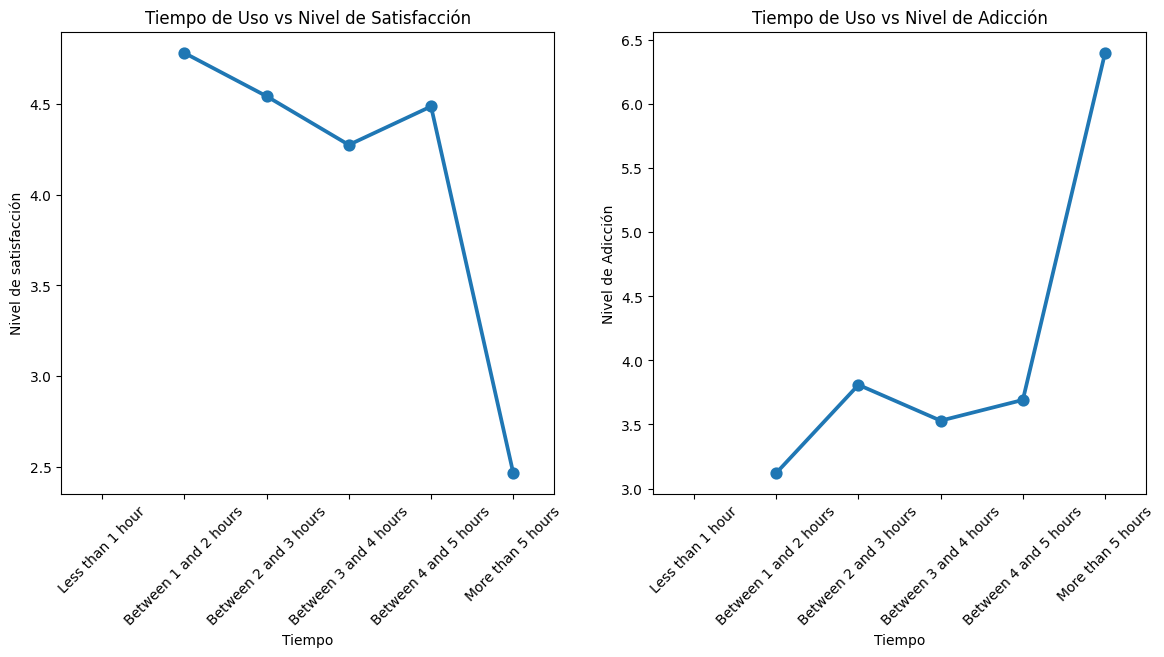

In [223]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.pointplot(x='Time_Spent', y='Satisfaction_Level', data=df, errorbar=None, order=[
    'Less than 1 hour', 'Between 1 and 2 hours', 'Between 2 and 3 hours', 
    'Between 3 and 4 hours', 'Between 4 and 5 hours', 'More than 5 hours'])
plt.title('Tiempo de Uso vs Nivel de Satisfacción')
plt.xticks(rotation=45)
plt.ylabel('Nivel de satisfacción')
plt.xlabel('Tiempo')



plt.subplot(1, 2, 2)
sns.pointplot(df, x='Time_Spent', y='Addiction_Level', errorbar=None, order=[
    'Less than 1 hour', 'Between 1 and 2 hours', 'Between 2 and 3 hours', 
    'Between 3 and 4 hours', 'Between 4 and 5 hours', 'More than 5 hours'])
plt.title('Tiempo de Uso vs Nivel de Adicción')
plt.ylabel('Nivel de Adicción')
plt.xlabel('Tiempo')
plt.xticks(rotation=45);


________________________________________________________________________________________________________________________________________________________
**<h1 style="text-align: center;">FIN</h1>**